In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
%sx pwd

from pprint import pprint

import matplotlib.pylab as plt
import openpifpaf.logs

# Latest

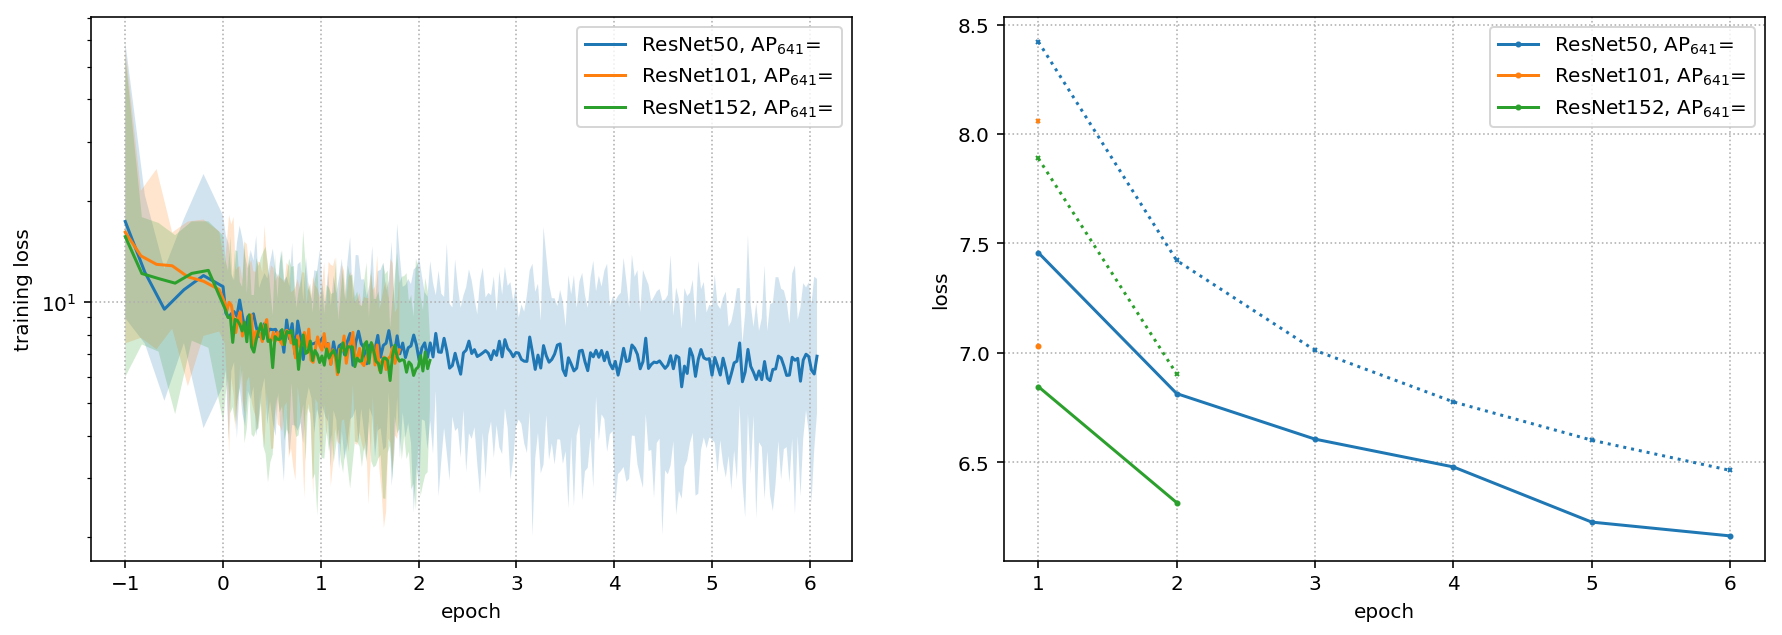

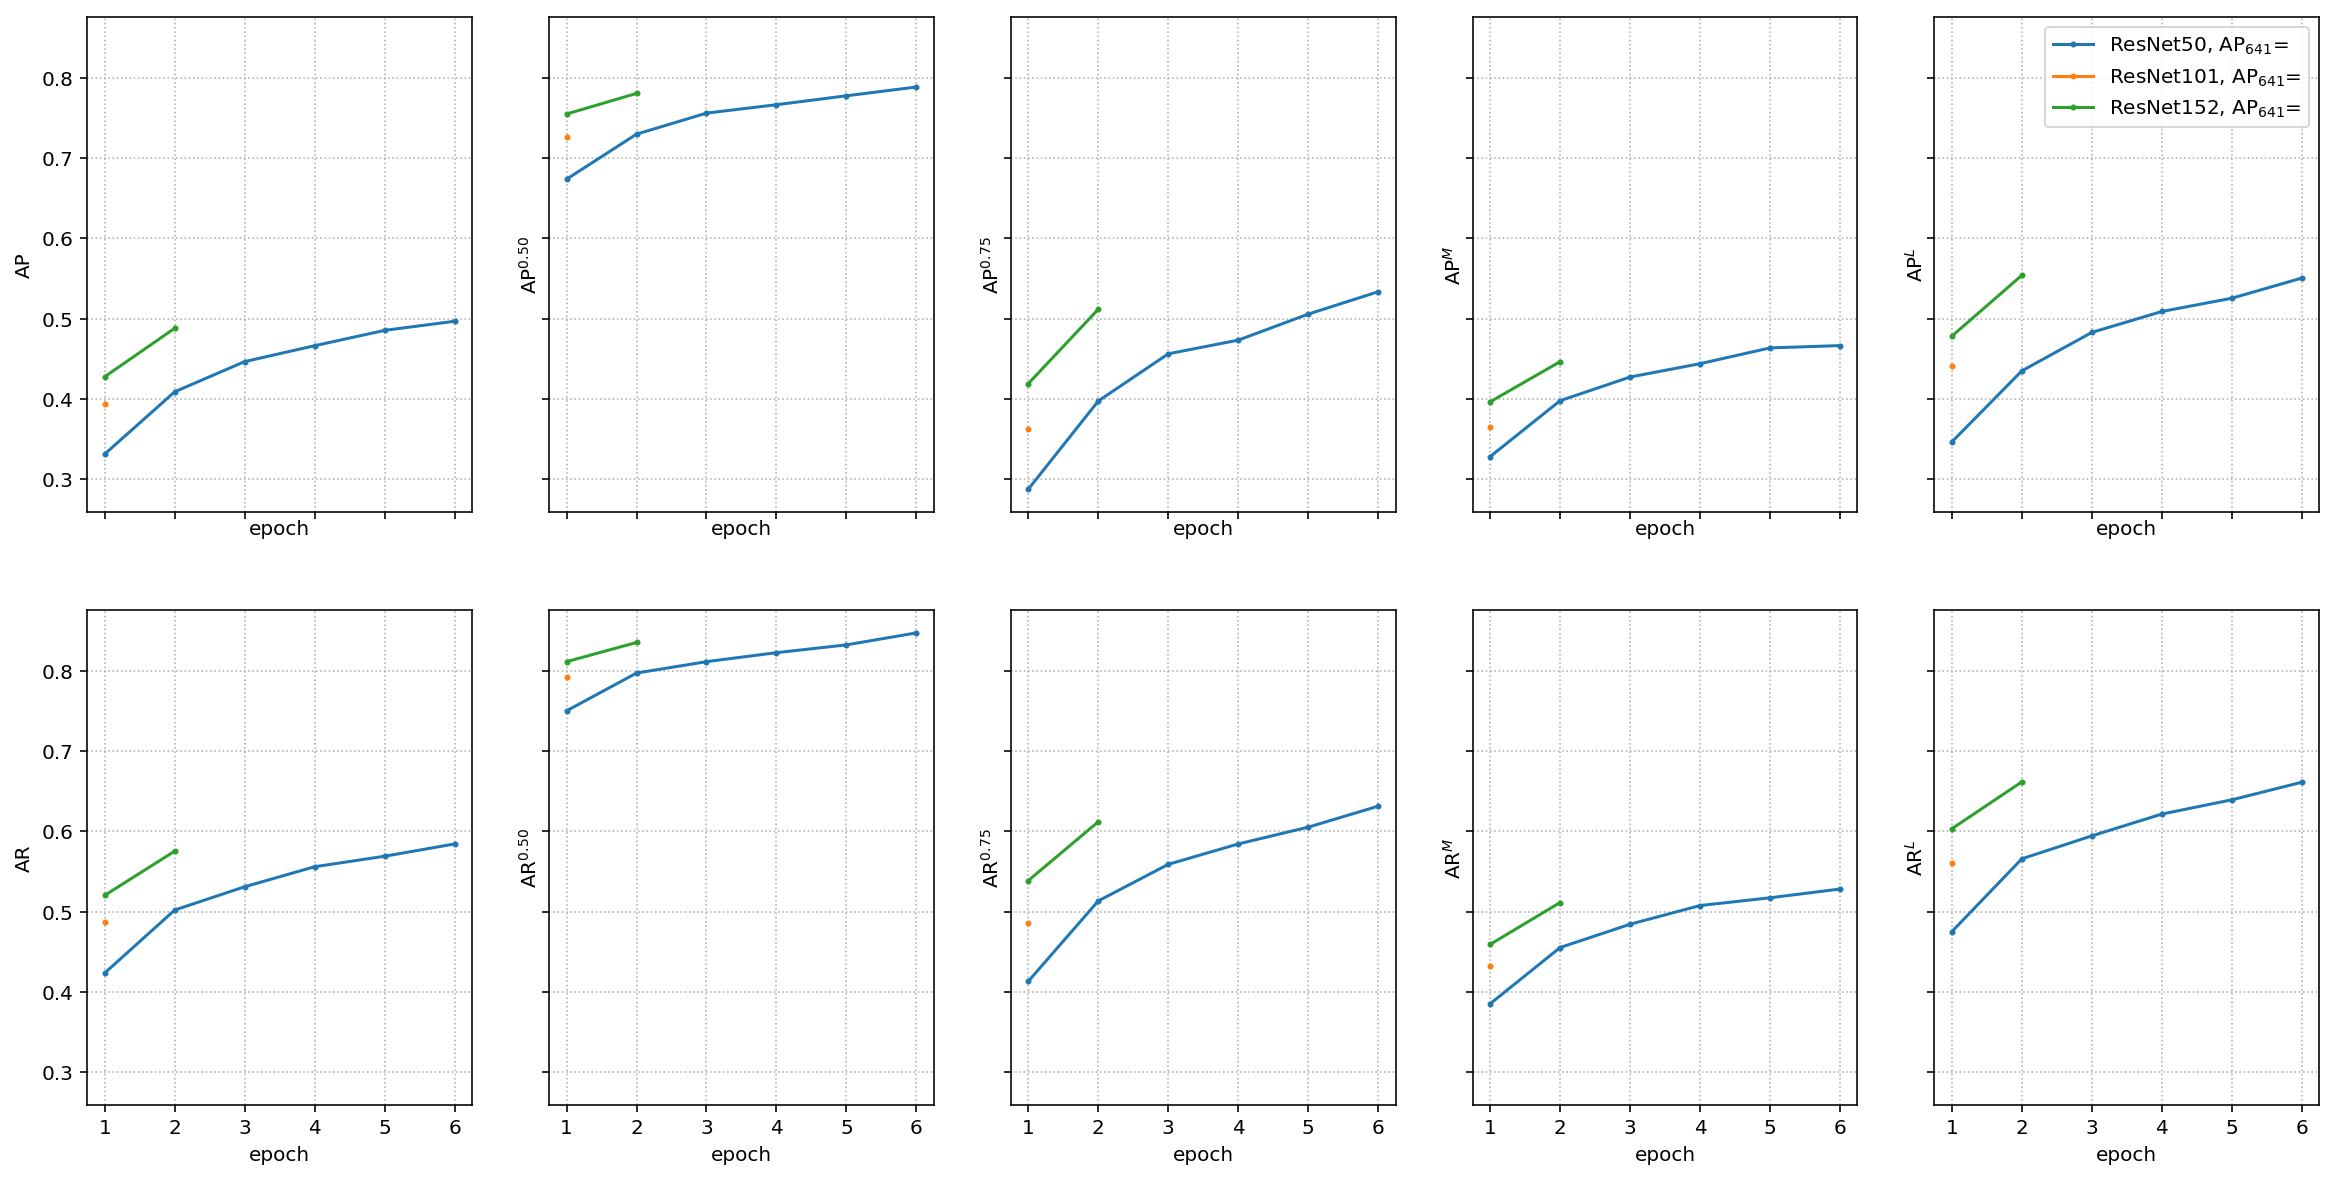

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plots = openpifpaf.logs.Plots([
    '../outputs/resnet50block5-pif-paf-edge401-laplace-190221-181336.pkl.log',
    '../outputs/resnet101block5-pif-paf-edge401-laplace-190221-213355.pkl.log',
    '../outputs/resnet152block5-pif-paf-edge401-laplace-190221-212949.pkl.log',
], [
    'ResNet50, AP$_{641}$=',
    'ResNet101, AP$_{641}$=',
    'ResNet152, AP$_{641}$=',
])
# pprint(plots.process_arguments())
plots.train(ax1); ax1.set_yscale('log', nonposy='clip')
plots.epoch_loss(ax2)

# Precision and Recall plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharey=True, sharex=True)
eval_plots = openpifpaf.logs.EvalPlots(plots.log_files, plots.labels, edge=641, samples=500)
# precisions
eval_plots.ap(axs[0, 0])
eval_plots.ap050(axs[0, 1])
eval_plots.ap075(axs[0, 2])
eval_plots.apm(axs[0, 3])
eval_plots.apl(axs[0, 4])
# recalls
eval_plots.ar(axs[1, 0])
eval_plots.ar050(axs[1, 1])
eval_plots.ar075(axs[1, 2])
eval_plots.arm(axs[1, 3])
eval_plots.arl(axs[1, 4])
axs[0, 4].legend();